In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
from numpy import random
import datetime
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import chi2_contingency
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from fonctions import *

In [2]:
df = pd.read_csv('df_final.csv', index_col = 0)

#### VISUALISATION DU DATAFRAME

In [3]:
df

,Pays,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique
0,Afghanistan,1.53,5.0,0.54,50.877193,49.122807,33.931,29.638,16.183,36296113.0,2058.4,-2.80
1,Afrique du Sud,35.69,143.0,14.11,24.268178,78.706327,16.063,9.757,-227.273,57009756.0,13860.3,-0.28
2,Albanie,16.36,85.0,6.26,80.851064,27.659574,-4.938,26.207,-290.000,2884169.0,12771.0,0.38
3,Algérie,6.38,22.0,1.97,0.722022,99.277978,21.138,10.470,-20.000,41389189.0,11737.4,-0.92
4,Allemagne,19.47,71.0,7.96,48.418631,87.061530,1.699,11.559,-41.000,82658409.0,53071.5,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...
127,Zambie,3.42,11.0,1.15,20.000000,81.666667,34.797,26.847,-58.333,16853599.0,3485.0,0.15
128,Zimbabwe,4.68,16.0,1.59,7.894737,90.789474,16.161,118.238,-36.036,14236595.0,3795.6,-0.71
129,Égypte,12.96,50.0,4.51,8.800000,89.440000,23.277,12.813,158.182,96442591.0,11014.5,-1.42
130,Émirats arabes unis,43.47,147.0,14.80,105.097087,11.650485,53.792,-2.347,-36.735,9487203.0,67183.6,0.62


## 1 - CLASSIFICATION ASCENDANTE HIERARCHIQUE (CAH)

In [4]:
pays = ['Pays']
names= df['Pays'].values
df_sans_pays = df.drop(pays + ['dispo_quanti'], axis=1)

In [5]:
# Selectionner les valeurs à utiliser pour notre analyse
pays = ['Pays']
names= df['Pays'].values
X = df_sans_pays.values
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

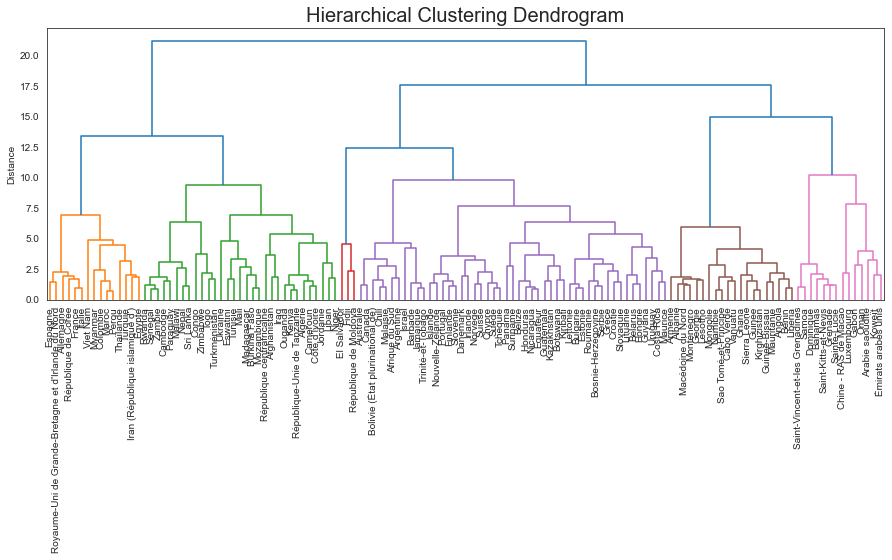

In [6]:
#Clustering hiérarchique: 
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(15,5))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = names, leaf_font_size=10, color_threshold=12, orientation='top')
plt.show()

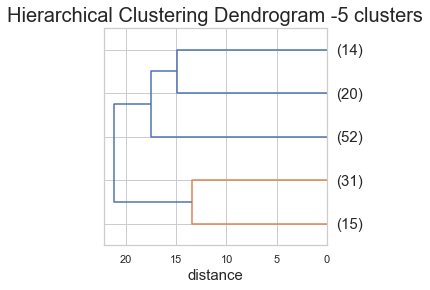

In [58]:
#Découpage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(4,4))
dendrogram(Z, labels = names, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')

plt.title('Hierarchical Clustering Dendrogram -5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)


plt.show()

In [8]:
#Isoler les groupes CAH
df["cluster_cah"] = fcluster(Z,t=5,criterion='maxclust')
cluster_cah = fcluster(Z,t=5,criterion='maxclust')
df["cluster_cah"] = df["cluster_cah"].apply(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pays                   132 non-null    object 
 1   dispo_quanti           132 non-null    float64
 2   dispo_calories         132 non-null    float64
 3   dispo_proteines        132 non-null    float64
 4   TDI (%)                132 non-null    float64
 5   TAS (%)                132 non-null    float64
 6   population_croissance  132 non-null    float64
 7   pib_croissance         132 non-null    float64
 8   stab_croissance        132 non-null    float64
 9   Population             132 non-null    float64
 10  Pib                    132 non-null    float64
 11  Stab_politique         132 non-null    float64
 12  cluster_cah            132 non-null    object 
dtypes: float64(11), object(2)
memory usage: 14.4+ KB


In [9]:
df.nunique()

Pays                     132
dispo_quanti             131
dispo_calories            92
dispo_proteines          128
TDI (%)                  113
TAS (%)                  116
population_croissance    132
pib_croissance           132
stab_croissance          125
Population               132
Pib                      132
Stab_politique           103
cluster_cah                5
dtype: int64

Observation CAH : <br>
Nous remarquons que nous avons 6 groupes sur notre DENDONGRAMME (dont 1 groupe avec 3 pays).<br>
Ceux ci ne sont pas très homogene. En effet nous avons un groupe de 52 pays et un autre de 14 pays.
<br>
<br>
Nous analyserons ces 5 groupes pour vérifier la pertinence de cette partition par la suite

# 2 - METHODE K_MEANS

## Identification du nombre de clusters

Recherche de vérification du nombre de clusters<br>

### Méthode du coude

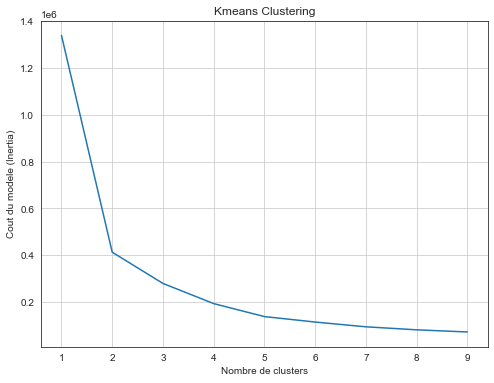

In [10]:
inertia = []
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(Z)
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.title('Kmeans Clustering')
plt.grid()
plt.show()

### Gap Statistic

Le nombre de classes optimal est 19


Text(0.5, 1.0, 'Détermination graphique du nombre de classes optimales pour le K-mean par la valeur Gap')

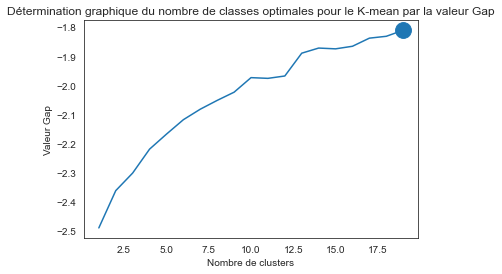

In [11]:
#Création de la méthode:
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

#Calcul
k, gapdf = optimalK(X_scaled, nrefs=5, maxClusters=20)
print("Le nombre de classes optimal est", k)

#Graphique:
plt.plot(gapdf.clusterCount, gapdf.gap)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250)
plt.xlabel("Nombre de clusters")
plt.ylabel("Valeur Gap")
plt.title("Détermination graphique du nombre de classes optimales pour le K-mean par la valeur Gap")

### Davies-Bouldin index

Text(0.5, 1.0, 'Détermination graphique du nombre de classes optimales pour le K-mean par le score de Davies Bouldin')

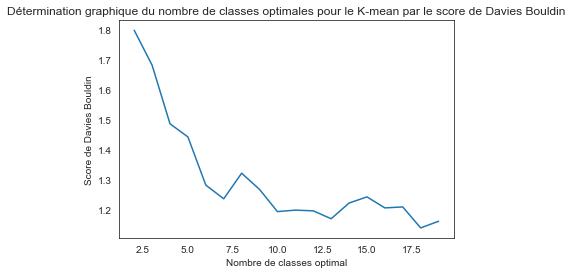

In [12]:
#Determination du nombre optimum de clusters pour le K-means: Score de Davies Bouldin:

# CReation de la methode:
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
# Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,20))

for center in centers:
    scores.append(get_kmeans_score(X_scaled, center))

#Graphique:
plt.plot(centers, scores)
plt.xlabel("Nombre de classes optimal")
plt.ylabel("Score de Davies Bouldin")
plt.title("Détermination graphique du nombre de classes optimales pour le K-mean par le score de Davies Bouldin")

### La méthode Silhouette

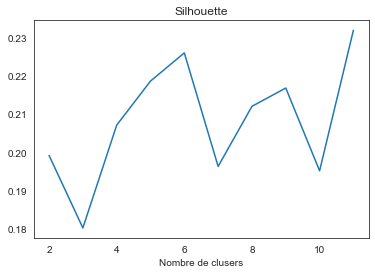

In [13]:
#Determination du nombre optimum de clusters pour le K-means: methode silhouette:

#Creation de la methode:
res = np.arange(10,dtype="double")                                   #On fait varier le nombre de clusters de 2 à 10
for k in np.arange(10):
    km = KMeans(n_clusters=k+2)
    km.fit(X_scaled)
    res[k] = metrics.silhouette_score(X_scaled,km.labels_)

#Graphique:
plt.title("Silhouette")
plt.xlabel("Nombre de clusers")
plt.plot(np.arange(2,12,1),res)

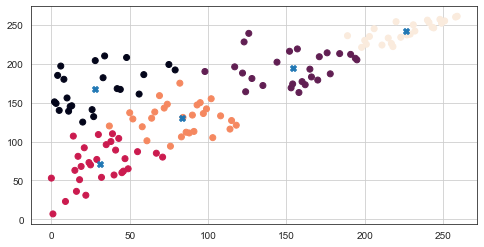

Inertie totale : 138681.43001224924


In [14]:
# Affichage du nuage de points (individus) en cluster avec les centoîdes
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=5)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='X')
plt.grid()
plt.show()
print('Inertie totale :',model.inertia_)

<b>OBSERVATIONS: </b> <br>

Le KMeans a besoin que l'on determine au préalable le nombre de cluster. Ainsi on fait varier ce nombre et ensuite on surveille l'évolution d'une indicateur selon la méthode choisie. 

Il existe ainsi plusieurs méthode pour déterminé le nombre optimal de cluster :<br>
<br>
 - <b>Méthode du coude </b>: On représente graphiquement la relation entre le nombre de cluster et la somme des carrés internes (inertia), ainsi on sélectionne le nombre de cluster où la courbe inertia commmence à s'applatir : ici 5 clusters <br>
<br>
 - <b>Coefficient de silhouette </b>: Le coefficient de silouhette est la différence entre la distance moyenne avec les points du même groupe (cohésion) et la distance moyenne avec les points des groupes voisins (séparation). Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. Plus le coefficient est proche de 1 et plus le cluster est pertinant. Cette méthode semble nous indiquer le nombre optimal de cluster de 5 et 9 <br>
 - <b>Dendrogramme</b>: voir partie précédente, on dertemine plutôt arbitairement le nombre de cluster idéal en fonction de la répartition des noeuds,on aurait ici 6 clusters dont un ne contenant qu'un faible nombre d'individus*.
 - <b>Davies-Bouldin Index</b>: Il se base sur les même principes de cohésion et de séparation que ci dessus mais plus il est bas plus le model sera optimisé. Il est minimal à 13.
 - <b>Gap Statistic</b>: On compare la cohésion d'un cluster à une référence nulle pour les données (ex: la distribution sans clustering). D'après cette méthode, le nombre idéal de clusters est la valeur pour laquelle la proximité des clusters sur les données d'origine tombe le plus loin en dessous de cette courbe de référence.. Plus la valeur est haute plus le model sera optimisé. Ici 18 ou 15 sont les plus fréquentes
<br>

Les indicateurs ici observés sont soumis aux itérations du Kmeans, chaque itération sera différentes.<br>
Après différentes relances du calculs, on trouve un nombre de cluster de <b>5</b>

## ANALYSE DES GROUPES

#### Découpage en classes – Matérialisation des groupes - Visualisation des centroides

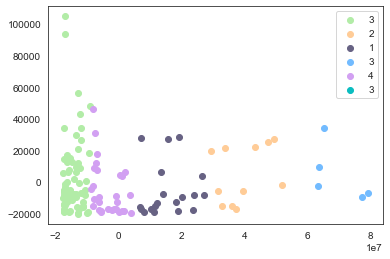

Text(0.5, 1.0, 'Projection des 5 centres sur le 1e plan factoriel')

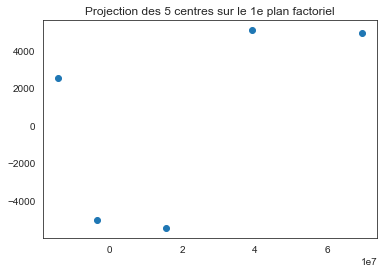

In [15]:
# Nombre de clusters:
n_clust = 5

# Clustering par K-means:
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Ajout d'une colonne contenant le cluster attribue:
clusters_km = km.labels_+1                              #+1 pour éviter d'avoir un cluster '0'
df["cluster_km"] = km.labels_+1
df["cluster_km"] = df["cluster_km"].apply(str)

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca_km = PCA(n_components=3).fit(X)

acp_km = PCA(n_components=3).fit_transform(X)
for couleur,k in zip(["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2","#0abdc0"],[0,1,2,3,4,5]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur)
    plt.legend(clusters_km)
plt.show()

# Affichage des positions des centres de classes
plt.figure()
centroids_km = km.cluster_centers_
centroids_km_projected = pca_km.transform(centroids_km)
plt.scatter(centroids_km_projected[:,0],centroids_km_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids_km)))

### Corrélation entre les variables

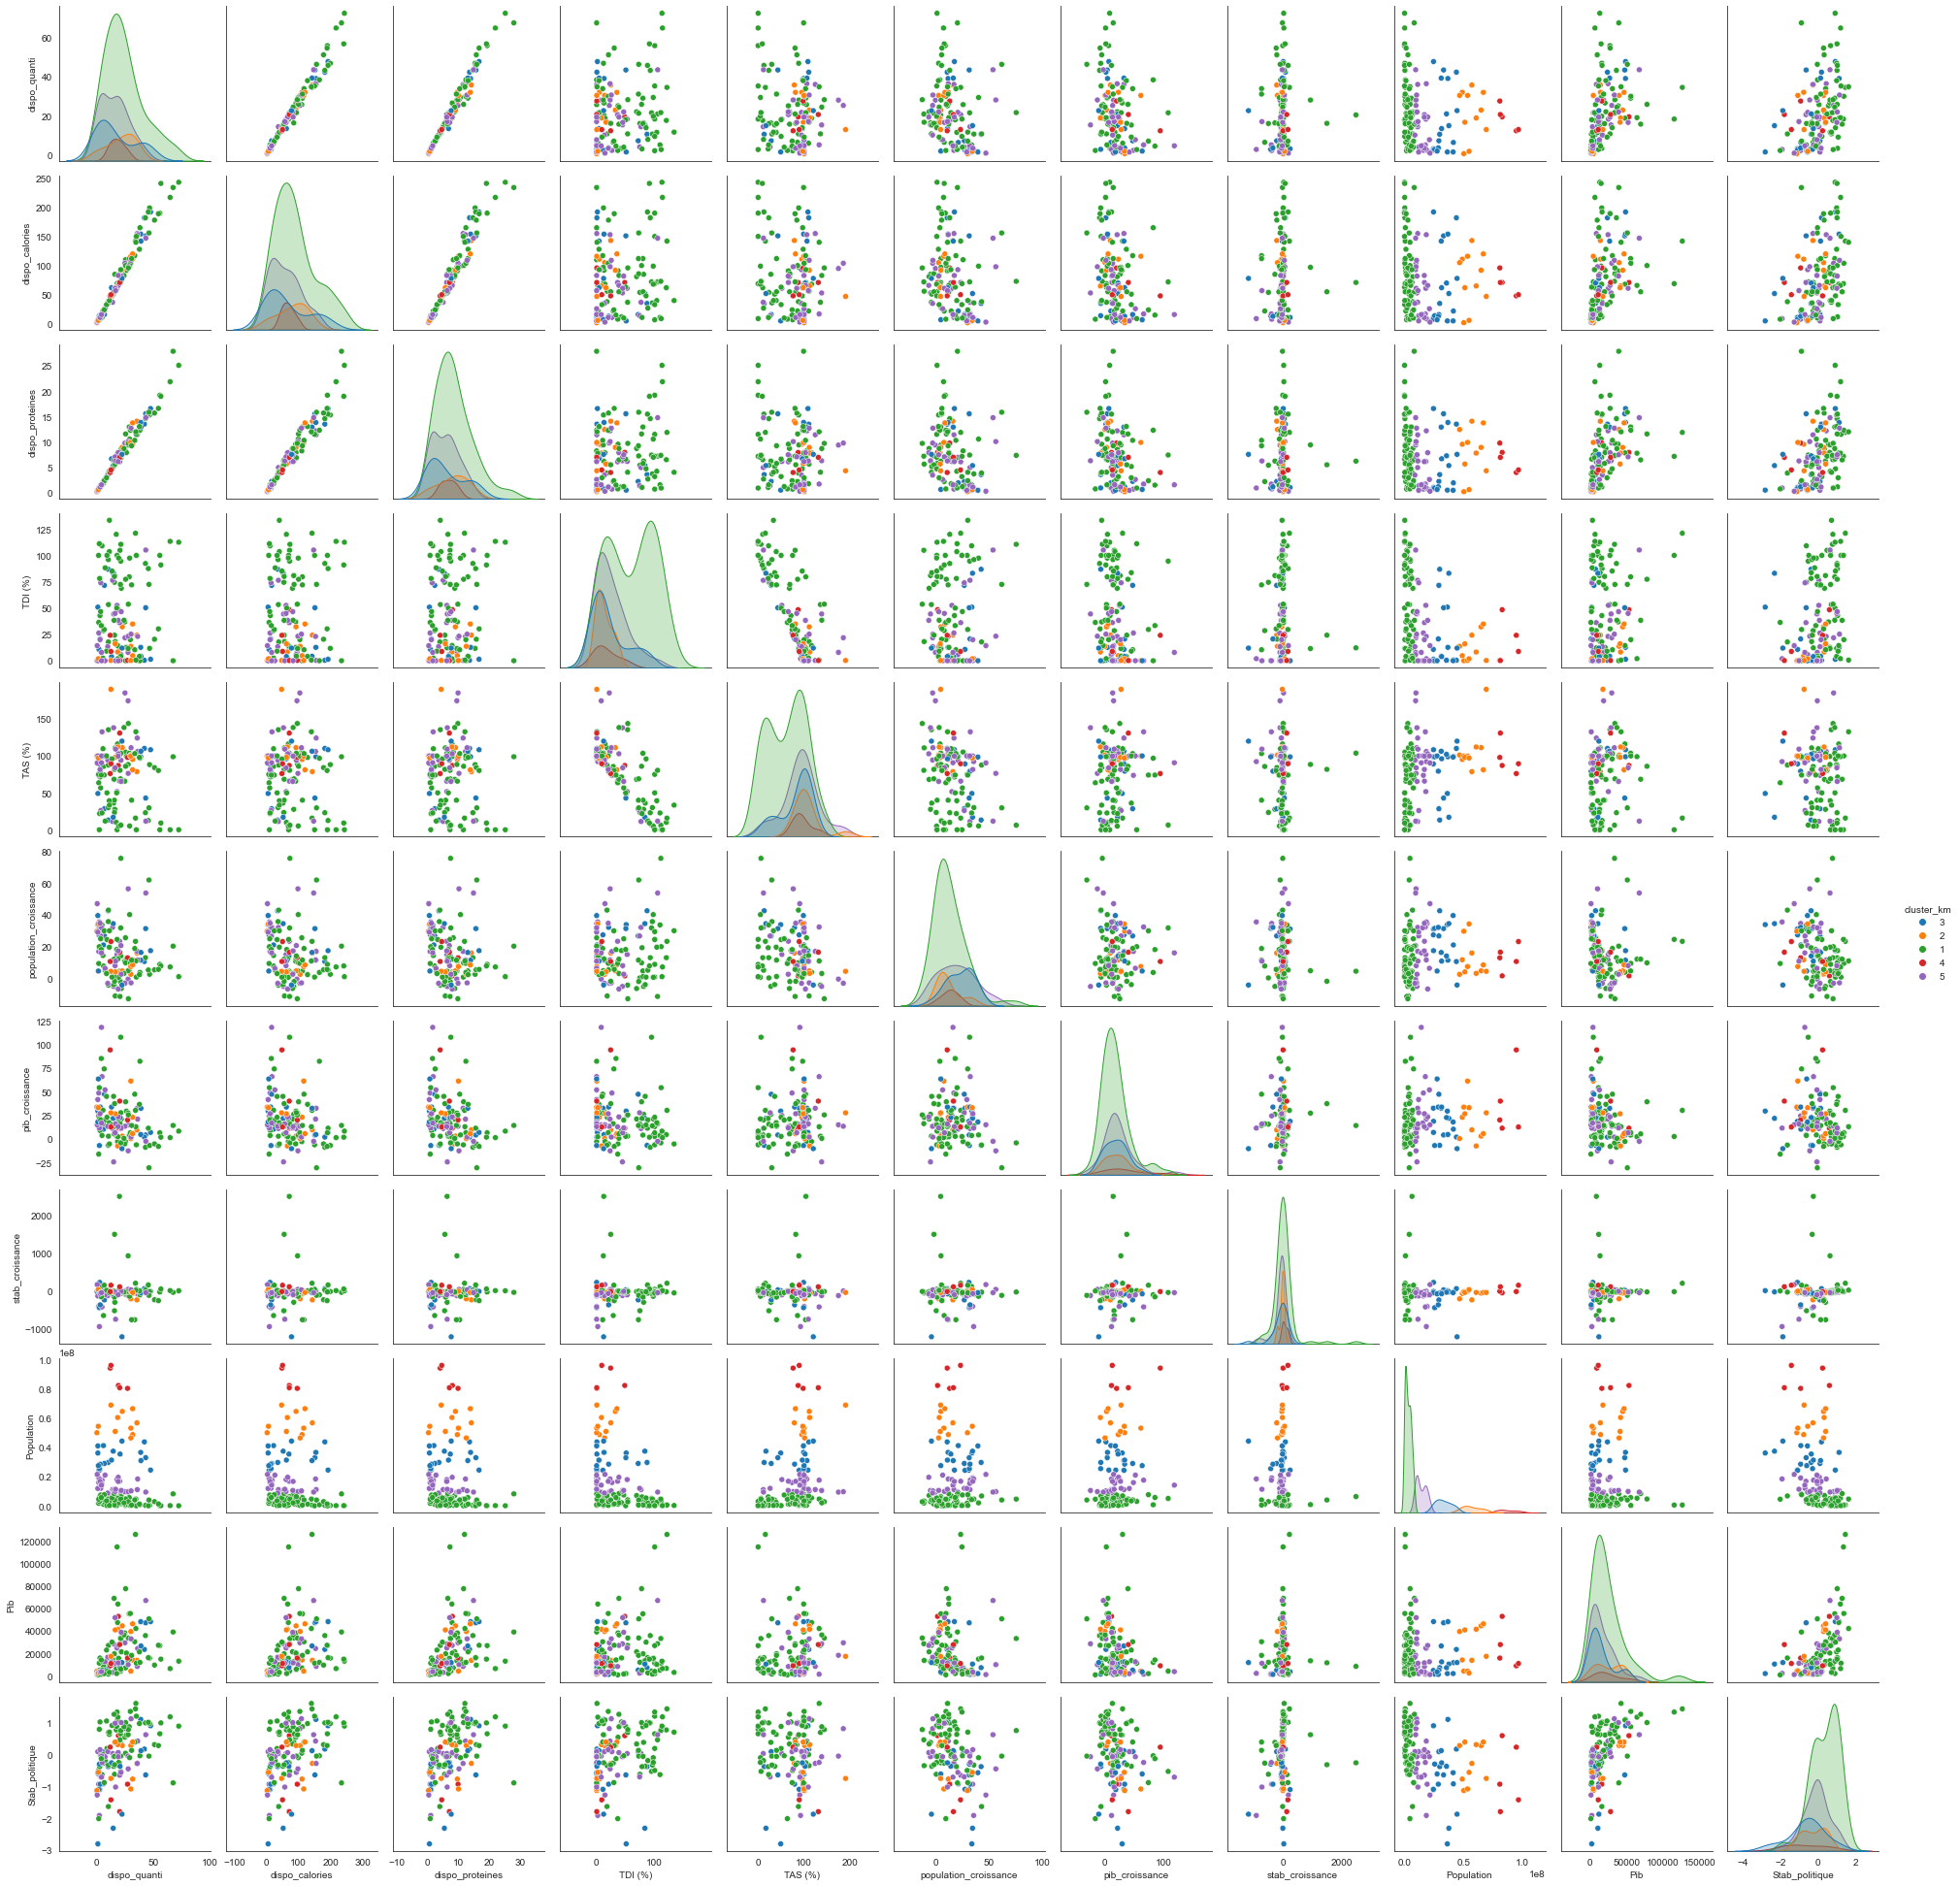

In [16]:
sns.pairplot(df, hue="cluster_km")

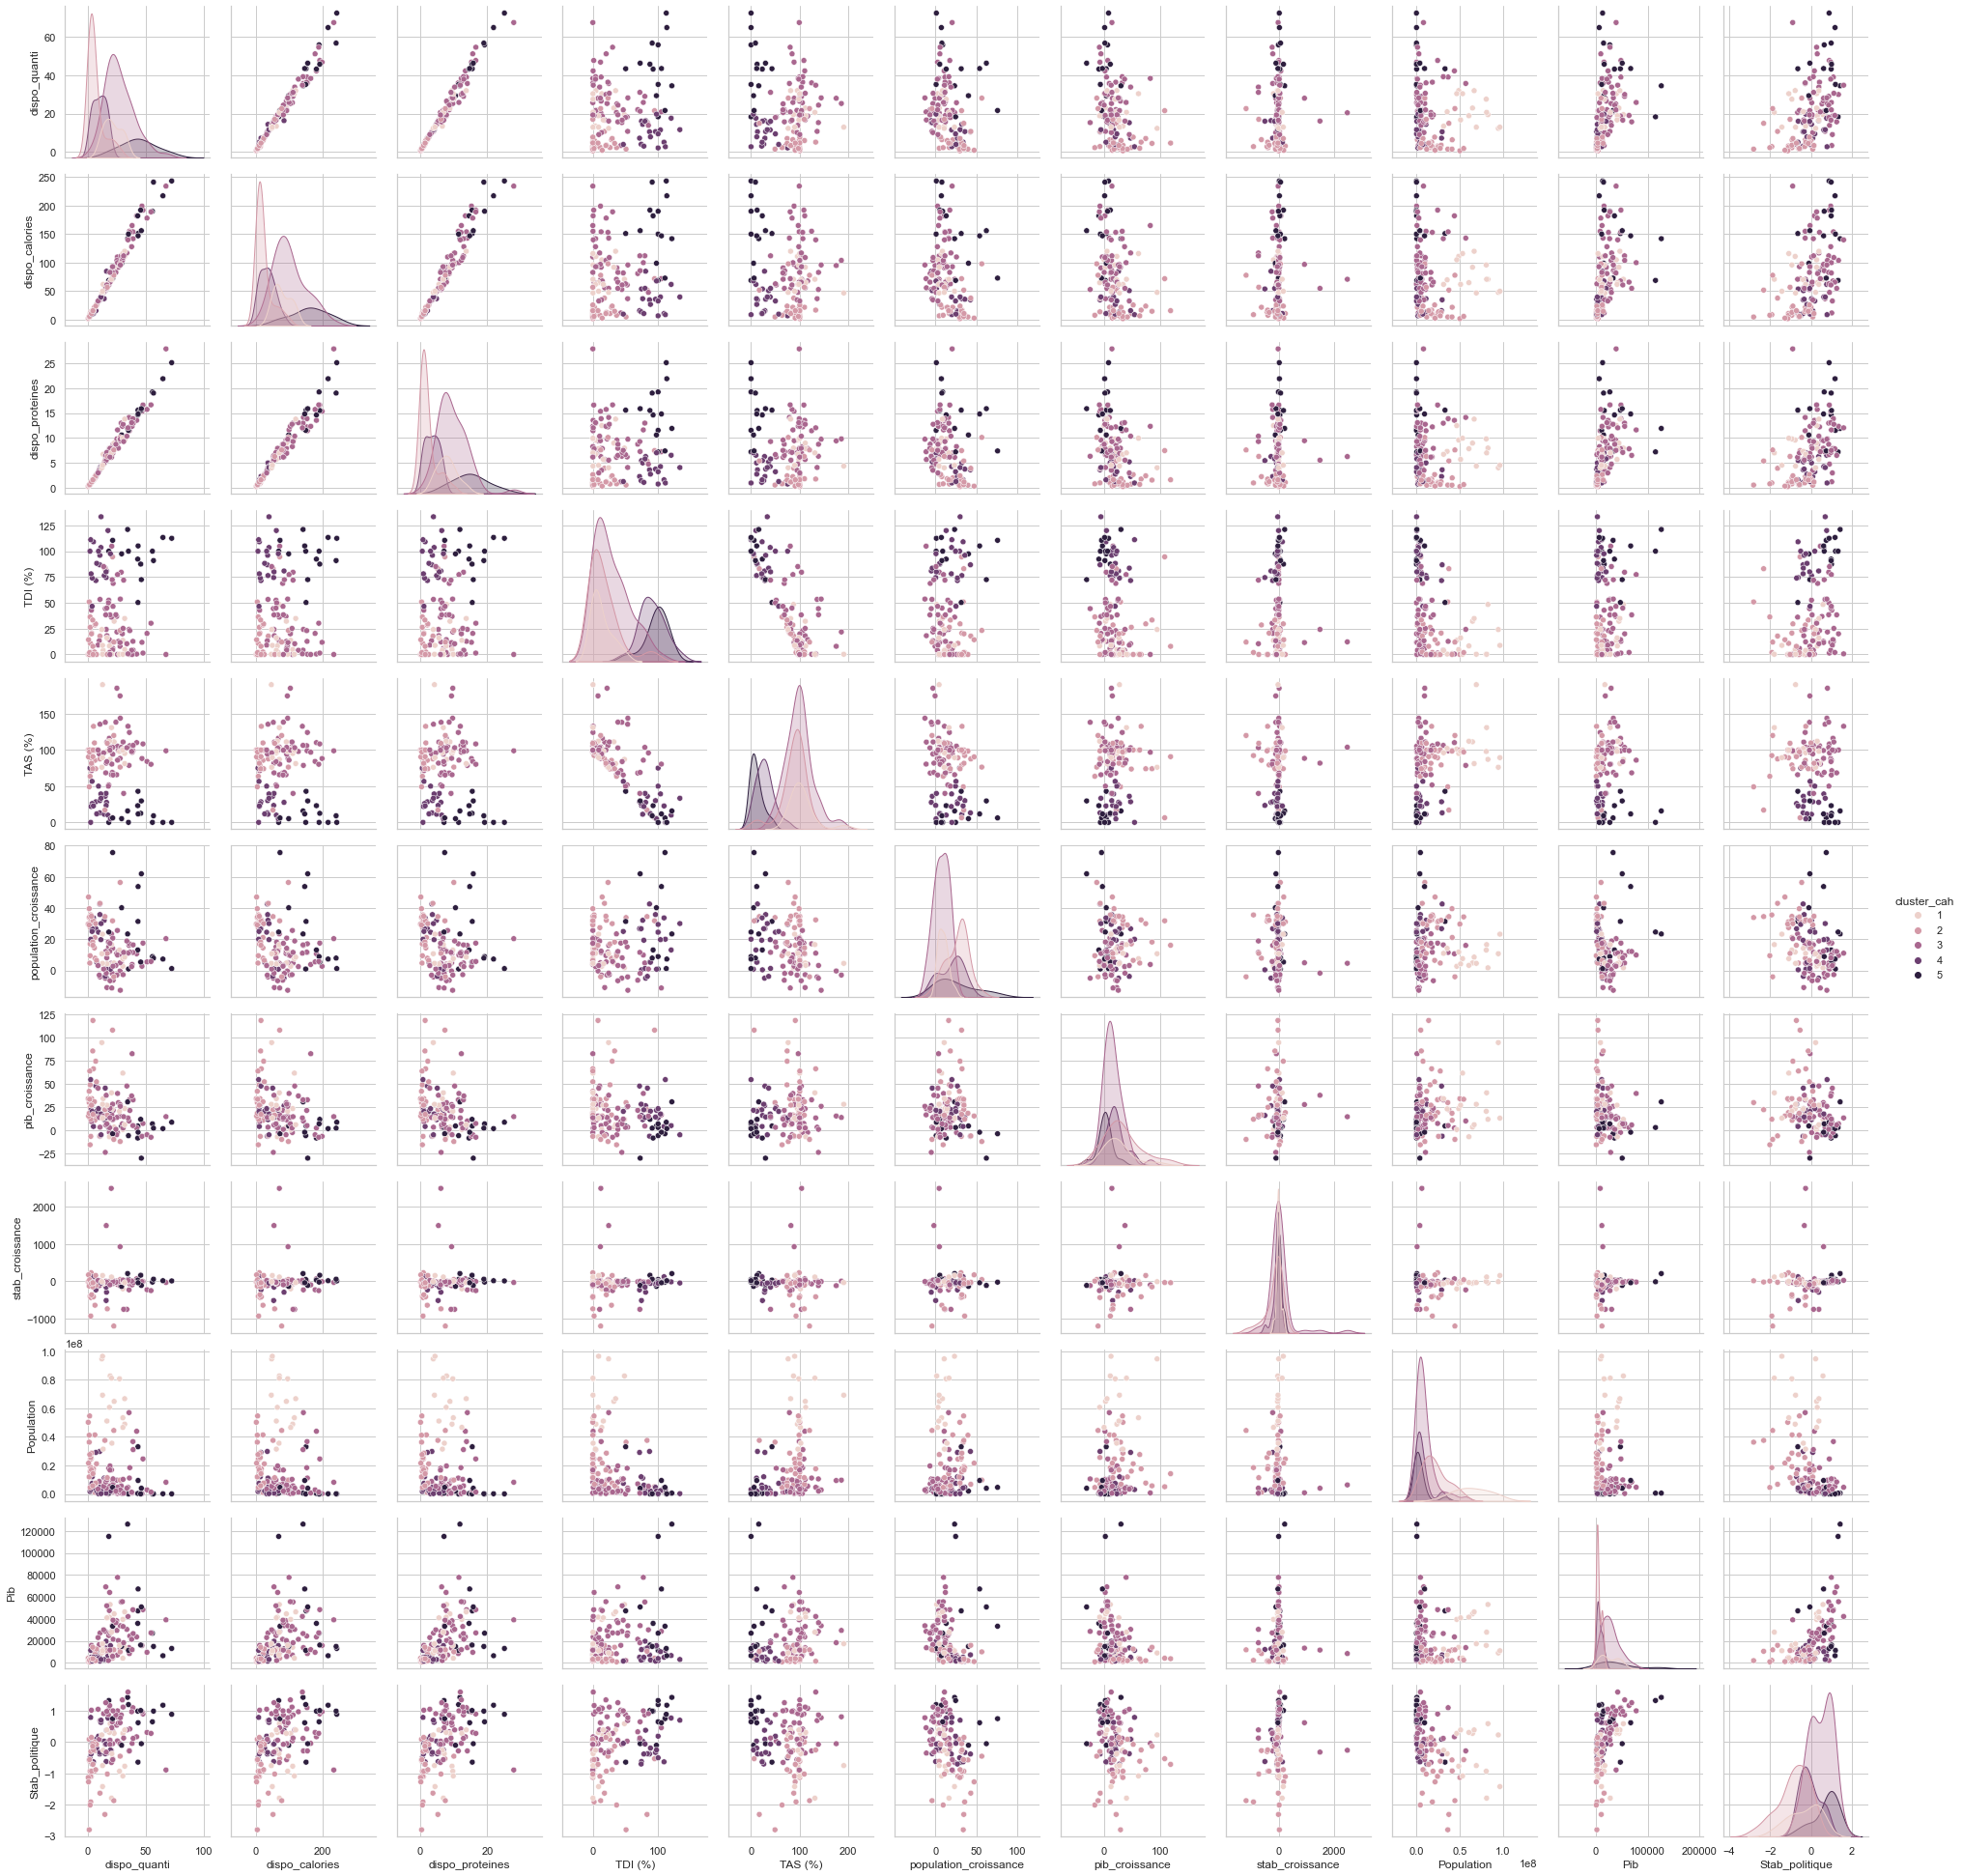

In [56]:
sns.pairplot(df, hue="cluster_cah")

### Analyse de découpage CAH et Kmeans

In [17]:
#Correspondance avec les groupes de la CAH
pd.crosstab(df["cluster_cah"],df["cluster_km"])

cluster_km,1,2,3,4,5
cluster_cah,,,,,
1,0,8,2,5,0
2,7,2,10,0,12
3,33,1,4,0,14
4,16,0,2,0,2
5,12,0,1,0,1


In [18]:
#Denombrement des pays par clusters:
#Pour les cluster issus de la CAH:
print(df.groupby(df["cluster_cah"]).size())

#Pour les clusters issus du K-means:
print(df.groupby(df["cluster_km"]).size())

cluster_cah
1    15
2    31
3    52
4    20
5    14
dtype: int64
cluster_km
1    68
2    11
3    19
4     5
5    29
dtype: int64


On s'aperçoit que la correspondance n'est pas parfaite entre les groupes définis par les deux méthodes.

#### Moyennes des variables par groupe

In [19]:
#On remet la variable cluster_cah en entier 
df["cluster_cah"] = df["cluster_cah"].apply(int)
#afficher les moyennes des variables de chaque groupe
groupe=(1,2,3,4,5)
for n in groupe:
    affi=df.loc[df['cluster_cah']==n].mean()
    print(affi)

dispo_quanti             2.156467e+01
dispo_calories           7.906667e+01
dispo_proteines          7.988000e+00
TDI (%)                  1.308916e+01
TAS (%)                  1.045937e+02
population_croissance    9.205000e+00
pib_croissance           2.514300e+01
stab_croissance         -1.986500e+01
Population               6.426715e+07
Pib                      2.570226e+04
Stab_politique          -3.266667e-01
cluster_cah              1.000000e+00
cluster_km               2.814949e+13
dtype: float64
dispo_quanti             6.550323e+00
dispo_calories           2.261290e+01
dispo_proteines          2.260645e+00
TDI (%)                  1.665560e+01
TAS (%)                  8.695653e+01
population_croissance    2.658765e+01
pib_croissance           3.216558e+01
stab_croissance         -1.755394e+02
Population               2.156223e+07
Pib                      5.657245e+03
Stab_politique          -8.377419e-01
cluster_cah              2.000000e+00
cluster_km               1.082359e+

In [59]:
# Moyenne par cluster de chaque composante issue de l'ACP (centroïdes)
centroides = df.groupby(['cluster_cah']).mean().reset_index()
centroides['cluster'] = 'centroïde'
centroides['pays'] = 'centroïde'
centroides.round(2)

,cluster_cah,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique,cluster,pays
0,1,21.56,79.07,7.99,13.09,104.59,9.20,25.14,-19.87,64267148.00,25702.26,-0.33,centroïde,centroïde
1,2,6.55,22.61,2.26,16.66,86.96,26.59,32.17,-175.54,21562232.00,5657.25,-0.84,centroïde,centroïde
2,3,27.11,101.48,9.56,28.52,98.22,7.12,15.09,33.57,9344121.96,27793.30,0.46,centroïde,centroïde
3,4,10.28,35.05,3.60,90.57,28.07,18.92,19.49,-84.50,6392866.50,7245.78,-0.04,centroïde,centroïde
4,5,43.60,160.86,15.01,96.68,11.14,25.42,1.47,18.82,3977999.43,41411.29,0.73,centroïde,centroïde


In [60]:
# Moyenne par cluster de chaque composante issue de l'ACP (centroïdes)
centroides1 = df.groupby(['cluster_km']).mean().reset_index()
centroides1['cluster'] = 'centroïde'
centroides1['pays'] = 'centroïde'
centroides1.round(2)

,cluster_km,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique,cluster_cah,cluster,pays
0,1,24.09,88.19,8.41,59.17,61.66,12.91,17.22,11.78,3078528.82,23644.05,0.35,3.49,centroïde,centroïde
1,2,21.31,79.00,7.96,12.39,105.91,11.61,19.83,-57.27,56670993.00,24493.65,-0.27,1.36,centroïde,centroïde
2,3,17.10,64.16,5.95,21.57,81.93,22.87,18.99,-116.54,33009031.47,14721.72,-0.62,2.47,centroïde,centroïde
3,4,18.58,67.20,6.65,16.36,96.30,13.08,35.83,45.50,87098396.20,23375.92,-0.66,1.00,centroïde,centroïde
4,5,15.94,58.48,5.62,24.47,92.88,19.36,22.09,-124.30,14017090.14,15759.16,-0.12,2.72,centroïde,centroïde


#### LES 5 CLUSTERS

In [20]:
# Cluster 1
cluster_1=df.loc[df['cluster_cah']==1]
cluster_1

,Pays,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique,cluster_cah,cluster_km
4,Allemagne,19.47,71.0,7.96,48.418631,87.061530,1.699,11.559,-41.000,82658409.0,53071.5,0.59,1,4
27,Colombie,31.99,111.0,9.57,4.747413,95.191722,11.826,23.145,-57.222,48909839.0,14171.3,-0.77,1,2
35,Espagne,30.39,105.0,12.47,13.694055,101.202405,2.682,0.537,-200.000,46647428.0,39528.9,0.28,1,2
40,France,22.90,92.0,8.95,32.167832,111.252384,4.806,3.183,-50.000,64842509.0,44577.1,0.28,1,2
52,Iran (République islamique d'),27.52,96.0,9.80,0.270270,97.927928,13.089,20.209,-0.000,80673883.0,15883.4,-0.93,1,4
57,Italie,18.88,65.0,7.83,8.269395,112.105712,3.278,-7.272,-31.111,60673701.0,41581.1,0.31,1,2
76,Maroc,20.96,70.0,7.29,0.402145,102.144772,14.175,22.785,-26.000,35581255.0,7312.1,-0.37,1,3
82,Myanmar,30.37,116.0,9.93,0.180072,99.759904,7.579,61.419,1.887,53382523.0,4224.5,-1.08,1,2
94,Pérou,13.47,62.0,6.71,3.939593,96.191727,10.981,33.885,-66.234,31444298.0,12506.5,-0.26,1,3
96,Royaume-Uni de Grande-Bretagne et d'Irlande du...,31.94,120.0,13.77,34.870188,81.199642,8.579,5.747,-32.759,66727461.0,46372.4,0.39,1,2


In [21]:
cluster_1.shape

(15, 14)

In [22]:
# Cluster 2
cluster_2=df.loc[df['cluster_cah']==2]
cluster_2

,Pays,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique,cluster_cah,cluster_km
0,Afghanistan,1.53,5.0,0.54,50.877193,49.122807,33.931,29.638,16.183,36296113.0,2058.4,-2.80,2,3
3,Algérie,6.38,22.0,1.97,0.722022,99.277978,21.138,10.470,-20.000,41389189.0,11737.4,-0.92,2,3
17,Burkina Faso,2.27,8.0,0.77,0.000000,100.000000,34.670,24.575,-400.000,19193234.0,2044.4,-0.93,2,5
21,Cambodge,2.34,11.0,0.74,26.315789,73.684211,17.028,48.769,-125.000,16009409.0,3928.4,0.09,2,5
22,Cameroun,3.16,11.0,1.07,0.000000,98.780488,31.157,18.804,233.333,24566073.0,3665.1,-1.10,2,3
28,Congo,21.53,72.0,7.45,94.545455,6.363636,31.851,107.802,-31.169,5110695.0,4234.7,-0.53,2,1
31,Côte d'Ivoire,2.53,8.0,0.86,10.769231,89.230769,27.469,32.718,-40.761,24437470.0,4830.8,-1.09,2,3
37,Eswatini,6.46,22.0,2.23,28.571429,85.714286,7.879,16.300,-640.000,1124805.0,8408.0,-0.27,2,1
53,Iraq,14.95,52.0,5.37,83.038869,16.961131,34.544,21.926,-16.606,37552781.0,10526.4,-2.31,2,3
59,Jordanie,28.07,98.0,10.10,23.272727,76.363636,56.441,-12.432,50.000,9785843.0,10003.6,-0.45,2,5


In [23]:
cluster_2.shape

(31, 14)

In [24]:
# Cluster 3
cluster_3=df.loc[df['cluster_cah']==3]
cluster_3

,Pays,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique,cluster_cah,cluster_km
1,Afrique du Sud,35.69,143.0,14.11,24.268178,78.706327,16.063,9.757,-227.273,57009756.0,13860.3,-0.28,3,2
7,Argentine,42.24,182.0,13.53,0.407747,110.142712,10.717,2.136,70.000,43937140.0,23597.1,0.17,3,3
9,Australie,47.65,192.0,16.60,1.366354,108.368915,17.538,7.084,-3.226,24584620.0,48398.5,0.90,3,3
11,Barbade,46.78,199.0,15.33,11.764706,88.235294,2.703,-6.764,-6.731,286232.0,15800.4,0.97,3,1
12,Belize,25.69,110.0,8.26,0.000000,105.263158,25.665,-2.709,-78.947,375769.0,7140.9,0.04,3,1
13,Bolivie (État plurinational de),36.00,155.0,11.43,0.233100,124.242424,17.099,32.632,-67.059,11192855.0,8423.7,-0.28,3,5
14,Bosnie-Herzégovine,16.70,56.0,5.66,18.181818,110.909091,-10.930,23.016,-44.444,3351525.0,13753.8,-0.35,3,1
15,Botswana,3.39,12.0,1.19,42.857143,71.428571,17.575,9.114,-3.774,2205080.0,15948.0,1.02,3,1
16,Bulgarie,22.06,81.0,8.74,68.789809,68.152866,-6.259,21.267,-8.333,7102444.0,21469.9,0.33,3,1
18,Bélarus,27.98,95.0,9.41,7.924528,174.716981,-0.319,15.137,-114.706,9450231.0,18356.1,-0.05,3,5


In [25]:
cluster_3.shape

(52, 14)

In [26]:
# Cluster 4
cluster_4=df.loc[df['cluster_cah']==4]
cluster_4

,Pays,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique,cluster_cah,cluster_km
2,Albanie,16.36,85.0,6.26,80.851064,27.659574,-4.938,26.207,-290.000,2884169.0,12771.0,0.38,4,1
5,Angola,10.56,35.0,3.60,86.833856,13.166144,42.627,-6.632,-43.284,29816766.0,7310.9,-0.38,4,3
8,Arménie,16.06,54.0,5.44,74.468085,23.404255,0.415,15.740,-513.333,2944791.0,12115.1,-0.62,4,1
19,Bénin,14.40,37.0,4.98,76.397516,11.180124,32.176,11.186,-92.308,11175198.0,3044.5,0.03,4,5
20,Cabo Verde,17.62,62.0,6.52,120.000000,10.000000,13.143,4.761,-12.500,537498.0,6643.2,0.77,4,1
42,Ghana,7.24,16.0,2.26,71.563981,28.436019,26.814,47.454,-228.571,29121465.0,5115.9,0.09,4,3
46,Guinée,4.08,14.0,1.42,74.000000,26.000000,26.784,27.872,-70.833,12067519.0,2417.8,-0.70,4,5
47,Guinée-Bissau,2.16,7.0,0.74,100.000000,75.000000,29.514,13.227,8.696,1828145.0,1925.2,-0.50,4,1
49,Géorgie,15.27,51.0,5.19,83.606557,36.065574,-3.795,45.211,-42.188,4008716.0,13589.7,-0.37,4,1
62,Kirghizistan,3.10,11.0,1.08,78.125000,21.875000,19.392,21.836,-61.616,6189733.0,5046.7,-0.38,4,1


In [27]:
cluster_4.shape

(20, 14)

In [28]:
# Cluster 5
cluster_5=df.loc[df['cluster_cah']==5]
cluster_5

,Pays,dispo_quanti,dispo_calories,dispo_proteines,TDI (%),TAS (%),population_croissance,pib_croissance,stab_croissance,Population,Pib,Stab_politique,cluster_cah,cluster_km
6,Arabie saoudite,43.36,151.0,15.57,50.313589,42.926829,31.434,4.336,36.170,33101179.0,47306.2,-0.64,5,3
10,Bahamas,43.17,182.0,14.61,92.307692,23.076923,13.150,-8.658,35.616,381755.0,35911.7,0.99,5,1
25,Chine - RAS de Macao,34.47,142.0,11.90,121.052632,15.789474,23.404,30.396,210.870,622585.0,126144.0,1.43,5,1
33,Dominique,35.19,150.0,11.52,100.000000,0.000000,0.937,-6.062,51.899,71458.0,11341.3,1.20,5,1
41,Gabon,29.33,99.0,10.59,97.435897,5.128205,40.219,4.377,-133.333,2064823.0,15006.8,-0.10,5,1
43,Grenade,45.70,192.0,15.50,87.500000,12.500000,5.404,11.522,165.789,110874.0,16217.5,1.01,5,1
64,Koweït,46.25,156.0,15.87,72.486772,29.629630,61.984,-30.357,-108.065,4056099.0,50855.6,-0.05,5,1
70,Luxembourg,18.33,69.0,7.19,100.000000,0.000000,24.635,2.739,-10.135,591910.0,114986.0,1.33,5,1
89,Oman,21.63,73.0,7.38,110.526316,6.140351,75.598,-4.000,-20.213,4665928.0,33308.5,0.75,5,1
102,Saint-Kitts-et-Nevis,55.77,190.0,19.22,100.000000,0.000000,8.931,6.693,-18.750,52045.0,26980.3,0.65,5,1


In [29]:
cluster_5.shape

(14, 14)

<AxesSubplot:xlabel='cluster_cah', ylabel='TDI (%)'>

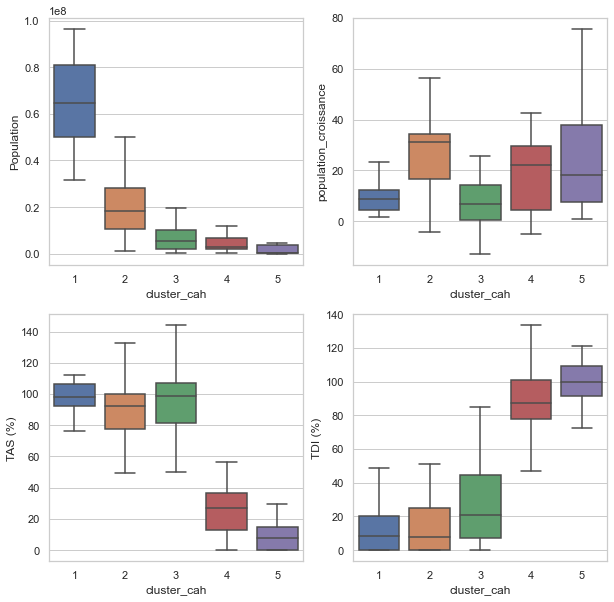

In [30]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df, x='cluster_cah', y='Population',showfliers = False)
plt.subplot(222)
sns.boxplot(data=df, x='cluster_cah', y='population_croissance',showfliers = False)
plt.subplot(223)
sns.boxplot(data=df, x='cluster_cah', y='TAS (%)',showfliers = False)
plt.subplot(224)
sns.boxplot(data=df, x='cluster_cah', y='TDI (%)',showfliers = False)


<AxesSubplot:xlabel='cluster_cah', ylabel='stab_croissance'>

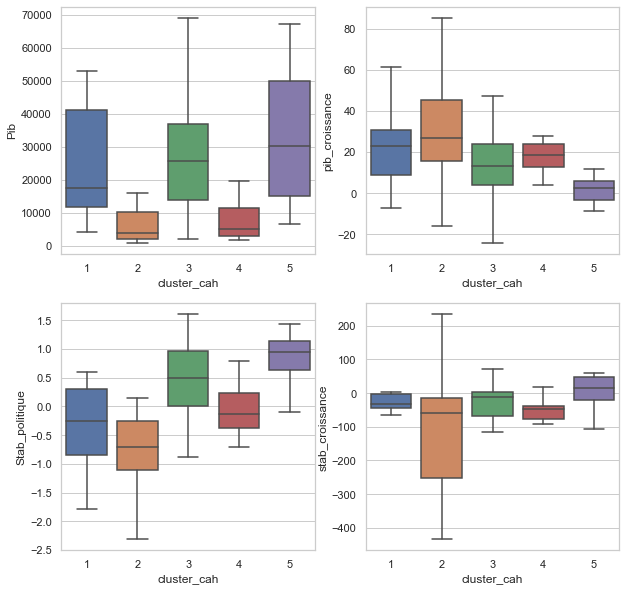

In [31]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df, x='cluster_cah', y='Pib',showfliers = False)
plt.subplot(222)
sns.boxplot(data=df, x='cluster_cah', y='pib_croissance',showfliers = False)
plt.subplot(223)
sns.boxplot(data=df, x='cluster_cah', y='Stab_politique',showfliers = False)
plt.subplot(224)
sns.boxplot(data=df, x='cluster_cah', y='stab_croissance',showfliers = False)

<AxesSubplot:xlabel='cluster_cah', ylabel='dispo_proteines'>

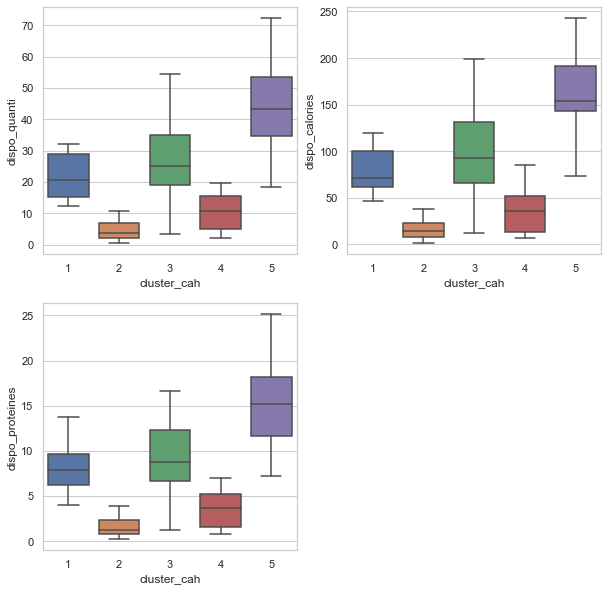

In [32]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df, x='cluster_cah', y='dispo_quanti',showfliers = False)
plt.subplot(222)
sns.boxplot(data=df, x='cluster_cah', y='dispo_calories',showfliers = False)
plt.subplot(223)
sns.boxplot(data=df, x='cluster_cah', y='dispo_proteines',showfliers = False)



In [33]:
#Moyenne globale
df.mean()

dispo_quanti              2.084955e+01
dispo_calories            7.664394e+01
dispo_proteines           7.340455e+00
TDI (%)                   4.061156e+01
TAS (%)                   7.643438e+01
population_croissance     1.565942e+01
pib_croissance            1.946592e+01
stab_croissance          -4.106586e+01
Population                1.743849e+07
Pib                       2.068813e+04
Stab_politique            1.719697e-02
cluster_cah               2.901515e+00
cluster_km               2.434419e+129
dtype: float64

### CARACTIRISTIQUES DE CHAQUE GROUPE
##### GROUPE 1
Ce groupe inclus essentiellement des pays avec :

 - Un taux de dépendance à l'importation des plus faible
 - Un taux d'auto-suffisance plutot élevé
 - Une croissance démographique des plus faible
 - Une disponibilité moyenne
 - Un PIB  moyen
 - Densité de population très forte
 
##### GROUPE 2
Ce groupe inclus essentiellement des pays avec :

 - Un taux de dépendance à l'importation des plus faible
 - Un taux d'auto-suffisance plutot élevé
 - Une croissance démographique élevée
 - Une disponibilité très faible
 - Un PIB faible
 - Densité de population plutot faible
 
##### GROUPE 3
Ce groupe inclus essentiellement des pays avec :

 - Un taux de dépendance à l'importation faible
 - Un taux d'auto-suffisance plutot élevé
 - Une croissance démographique faible
 - Une disponibilité moyenne
 - Un PIB fort
 - Densité de population plutot faible
 
##### GROUPE 4
Ce groupe inclus essentiellement des pays avec :

 - Un taux de dépendance à l'importation des plus élevé
 - Un taux d'auto-suffisance des plus faible
 - Une croissance démographique fort
 - Une disponibilité faible
 - Un PIB plutot faible
 - Densité de population plutot faible

##### GROUPE 5
Ce groupe inclus essentiellement des pays avec :

 - Un taux de dépendance à l'importation élevé
 - Un taux d'auto-suffisance faible
 - Une croissance démographique moyenne
 - Une disponibilité très forte
 - Un PIB très fort
 - Densité de population très faible

#### OBSERVATIONS
Un groupe présente des caractéristiques intéressantes pour notre objectif d'exportation :

##### LE GROUPE 4
Au vu des caractéristiques de chaque groupe la combinaison la plus favorable à la selection du meilleur groupe en terme de besoin de viande de volaille met en avant le groupe numéro 4 :

 - dispo_quanti : 10.28
 - dispo_calories : 35.05
 - dispo_proteines  : 3.60
 - TAS (%) : 28.07
 - TDI (%) : 90.57
 - population_croissance : 0.189
 - Population : 6392866
 - pib_croissance : -0.85
 - Pib : 7245.77
 - Stabilité politique : -0.0435

Le taux de dépendance à l'importation est très élevé contrairement au taux d'auto-suffisance qui est très bas.

La croissance démographique est la plus élevée.

Les disponibilités alimentaires sont égalements relativement basses.

#### CORRELATION DES VARIABLES DANS CHAQUE GROUPE

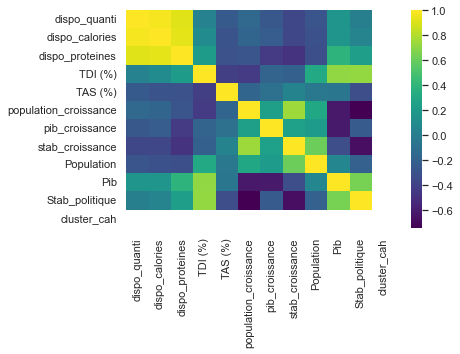

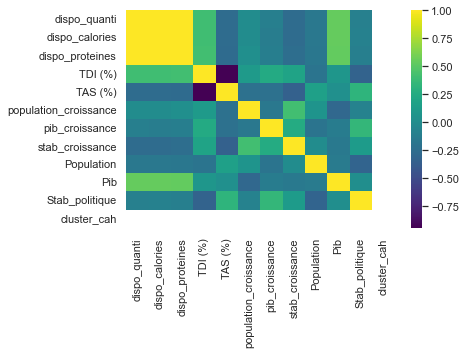

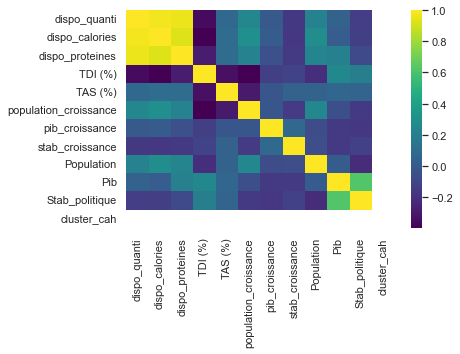

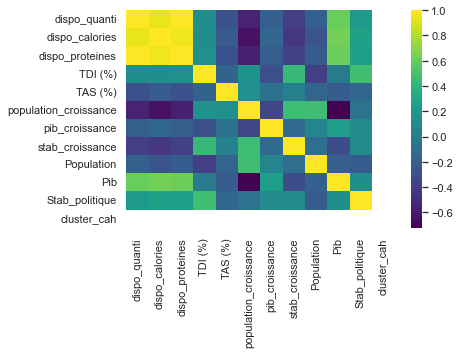

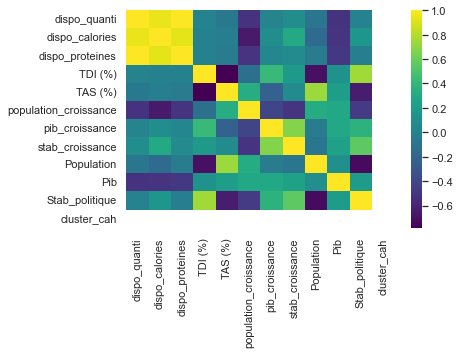

In [34]:
# heatmap de corrélations entre les différentes variables dans chaque cluster
groupe=(cluster_1,cluster_2,cluster_3,cluster_4,cluster_5)
for n in groupe:
    sns.heatmap(n.corr(),cmap='viridis')  
    plt.show()

#### OBSERVATIONS : 
La heatmap du cluster numéro 1 confirme bien notre choix

#### Observations :
Les groupes 4 présentent les critères :


- TDI très élevé
- TAS très faible
- Disponiblités faibles
- PIB plutot faible
- Densité de population plutot faible
- Une croissance démographique fort

On peut constater que ces pays présentent des disponibilités faibles alors que le Taux de dépendance à l'importation (TDI) est élevé

Ces pays peuvent être une destination pertinente pour l'exportation de viande de volaille

Liste des pays en question : 
 -  Albanie
 -                     Angola
 -                  Arménie
 -                   Bénin
 -              Cabo Verde
 -                   Ghana
 -                  Guinée
 -           Guinée-Bissau
 -                 Géorgie
 -            Kirghizistan
 -                 Lesotho
 -                 Libéria
 -       Macédoine du Nord
 -              Mauritanie
 -                Mongolie
 -             Monténégro
 -                 Namibie
 -   Sao Tomé-et-Principe
 -           Sierra Leone
 -               Vanuatu


On pourrait également utilisé les coùt d'importation, les taxes des pays, le cout du transport pour affiner notre recherche.
Cette liste sera affinée avec les équipes métiers